# Volume 4: SIR Models
    Daniel Perkins
    MATH 437
    8/13/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people have recently entered the city carrying a certain disease.
Each infected individual has one contact each day that could spread the disease, and an average of three days is spent in the infectious state.

Find the solution of the corresponding SIR equations using `solve_ivp` over a time period of fifty days, and plot your results.
Compare your plot to the figure in the lab pdf.
Use the percentages of each state, not the actual number of people in the state.

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the `t_eval` argument of `solve_ivp` to specify the points in time that you want the solution's value at.
This parameter accepts a linspace of time values.
Specify enough points that your graph is smooth.

In [43]:
def prob1():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    N = 5000   # Total population
    Beta = 1   # One contact Per Day
    Gamma = 1/3  # On average a person spends 3 days infected
    
    # define the ode system as given in the problem
    def ode(t, y):   # y = [S, I, R]
        return np.array([-Beta*y[1]*y[0], Beta*y[1]*y[0] - Gamma*y[1], Gamma*y[1]])
    
    # define the t0 and tf parameters
    t0 = 0
    tf = 50
    ts = np.linspace(t0, tf, 300)
    # define the initial conditions
    y0 = np.array([N - 5, 5, 0]) / N  # 5 people start as infected
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=ts)
    
    # plot y_1 against y_2
    plt.plot(ts, sol.y[0], c="black", label="Susceptible")
    plt.plot(ts, sol.y[1], c="red", label="Infected")
    plt.plot(ts, sol.y[2], c="blue", label="Recovered")
    plt.xlabel('T (days)')
    plt.ylabel('Proportion of Population')
    plt.legend(loc="upper right")
    plt.show()
    
    # Find how many people are available to work at the peak
    infection_peak = np.argmax(sol.y[1])
    proportion = sol.y[0][infection_peak] + sol.y[2][infection_peak]
    num_people = proportion * N
    print(f"{num_people} people are still able to work at the peak of the infection")

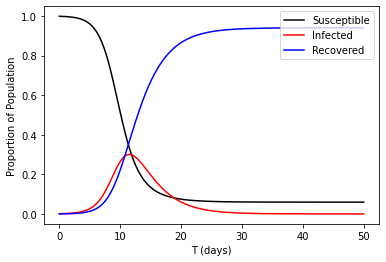

3496.4469517139096 people are still able to work at the peak of the infection


In [44]:
prob1()

3496 people are still able to work at the peak of the infection

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of COVID-19.
On that day, New York started its lock-down measures.
Using the following information, model what the spread of the virus could have been, using `solve_ivp()`, if New York did not implement any measures to curb the spread of the virus over the next 150 days:


 - There are approximately 8.399 million people in New York City.
 - The average case of COVID-19 lasts for 10 days.
 - Each infected person spreads the virus to 2.5 people on average over the whole time that they are sick.

Plot your results for each day and compare to the figure in the lab pdf.
Also answer the following questions:
 - At the projected peak, how many concurrent active cases are there?
 - Assuming that about 5% of COVID-19 cases require hospitalization, and using the fact that there are about 58,000 hospital beds in NYC, how many beds over capacity will the hospitals in NYC be at the projected peak?

Hint: Recall that $\beta$ is the average number of contacts an infected person makes per day that could spread the disease, and $\gamma$ is the reciprocal of the average length of time spent in the infectious phase.

In [51]:
def prob2():
    '''
    Implement the SIR model, plot a graph that models the
    spread of COVID-19 in NYC, and answer these questions:
      1. What is the number of concurrent cases at the projected peak?
      2. How many hospital beds over capacity will NYC be at the projected peak?
    Print your answers to the two questions questions.
    '''
    N = 8399000   # Total population
    Beta = .25   # 1/4 contacts Per Day
    Gamma = 1/10  # On average a person spends 10 days infected
    
    # define the ode system as given in the problem
    def ode(t, y):   # y = [S, I, R]
        return np.array([-Beta*y[1]*y[0], Beta*y[1]*y[0] - Gamma*y[1], Gamma*y[1]])
    
    # define the t0 and tf parameters
    t0 = 0
    tf = 150
    ts = np.linspace(t0, tf, 300)
    # define the initial conditions
    y0 = np.array([N - 52, 52, 0]) / N  # 52 people start as infected
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=ts)
    
    # plot y_1 against y_2
    plt.plot(ts, sol.y[0], c="black", label="Susceptible")
    plt.plot(ts, sol.y[1], c="red", label="Infected")
    plt.plot(ts, sol.y[2], c="blue", label="Recovered")
    plt.title("Modeling Covid-19 in NYC")
    plt.xlabel('Days since Mar 11)')
    plt.ylabel('Proportion of Population')
    plt.legend(loc="upper right")
    plt.show()
    
    # Find how many people are available to work at the peak
    infection_peak = np.max(sol.y[1]) * N
    print(f"At the projected peak, there will be {infection_peak} concurrent cases.")
    hospital_beds = infection_peak * 0.05
    beds_over_capacity = hospital_beds - 58000
    print(f"The hospitals in NYC will be {beds_over_capacity} beds over capacity at the projected peak")

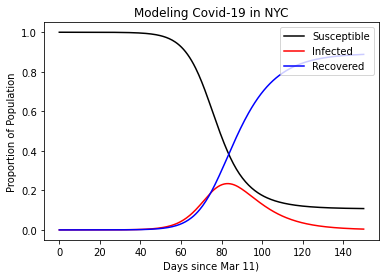

At the projected peak, there will be 1967304.5143471598 concurrent cases.
The hospitals in NYC will be 40365.225717358 beds over capacity at the projected peak


In [52]:
prob2()

1. At the projected peak, there will be 1,967,305 concurrent cases.

2. The hospitals in NYC will be 40,365 beds over capacity at the projected peak

# Problem 3

There are 7 billion people in the world.
Influenza, or the flu, is one of those viruses that everyone can be susceptible to, even after recovering.
The flu virus is able to change in order to evade our immune system, and we become susceptible once more, although technically it is now a different strain.

Suppose the virus originates with 1000 people in Texas after Hurricane Harvey flooded Houston, and stagnant water allowed the virus to proliferate.
Suppose the average person is contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with rate $f=1/50$.
The flu is also known to be deadly, killing hundreds of thousands every year on top of the normal death rate.
To assure a steady population, let the birth rate balance out the death rate, and let $\mu=0.0001$.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a one-year span (365 days).
Compare your plot to the figure in the lab pdf.

In [57]:
def prob3():
    '''
    Use the SIRS model to model the spread of flu over the course of a year,
    and create a plot of your results.
    '''
    
    N = 7000000000   # Total population
    Beta = .5   # 1/2 contacts Per Day
    Gamma = 1./10  # On average a person spends 10 days infected
    f = 1./50  # Recovered individuals become susceptible at this rate
    mu = 0.0001  # Birth and death rate
    
    # define the ode system as given in the problem
    def ode(t, y):   # y = [S, I, R]
        return np.array([f*y[2] + mu*(1-y[0]) - Beta*y[1]*y[0], 
                         Beta*y[1]*y[0] - (Gamma+mu)*y[1], 
                         -f*y[2] + Gamma*y[1] - mu*y[2]])
    
    # define the t0 and tf parameters
    t0 = 0
    tf = 365
    ts = np.linspace(t0, tf, 500)
    # define the initial conditions
    y0 = np.array([N - 1000, 1000, 0]) / N  # 52 people start as infected
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=ts)
    
    # plot y_1 against y_2
    plt.plot(ts, sol.y[0], c="black", label="Susceptible")
    plt.plot(ts, sol.y[1], c="red", label="Infected")
    plt.plot(ts, sol.y[2], c="blue", label="Recovered")
    plt.title("Modeling Worldwide Influenza Cases")
    plt.xlabel('Day')
    plt.ylabel('Proportion of Population')
    plt.legend(loc="upper right")
    plt.show()

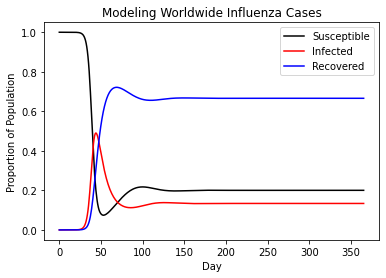

In [58]:
prob3()

# Problem 4

The file `new_york_cases.npy` contains daily case counts for COVID-19 beginning on March 11, 2020.
These counts are the total number of people who have been sick at any time up to that point; that is, the sum of the number of people currently infected and the number of people who have recovered, corresponding to $I(t)+R(t)$.
    
Convert these counts to proportions of New York's population (recall that the total population is 8.399 million people).
Fit the PGED model to the COVID-19 data by using `scipy.optimize.minimize` to find values of $\alpha$ and $T_G$ that minimize the difference between the observed proportions and the model's prediction for $I(t)+R(t)$.
Unlike the example above, in this problem our model is a system of ODEs rather than an explicit formula.
So, to find `model_output` in the function you pass into `scipy.optimize.minimize`, you will need to use `solve_ivp` to solve the system of ODEs every time the function is called.
    
Plot the actual data alongside the values of $I(t)+R(t)$ predicted by your model.
Print the values of $\alpha$ and $T_G$ you found.

Hint: Set $t_0=1$; the PEGD model requires to divide by $t$, so we must have $t\ne0$.
To pass the values of $\alpha$ and $T_G$ into your ODE function, you can use the argument `args=(alpha, T_G)` inside `solve_ivp`.
Use the `t_eval` argument to get the ODE solution values at the correct times.

In [154]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against I(t)+R(t).
    '''
    # define the t0 and tf parameters
    N = 8399000   # Total population
    data = np.load("new_york_cases.npy") / N  # Proportion of city infected
    t0 = 1
    tf = len(data)
    ts = np.linspace(t0, tf, tf)
    y0 = np.array([1 - data[0], data[0], 0])  # people started as infected
    
    def calculate_error(params):
        a, TG = params
        def ode(t, y, a, TG):  # Define the ode system as given in the problem
            S, I, R = y
            return [ (a / t) * I , (a / t - 1/TG) * I, (1/TG) * I]
        sol = solve_ivp(ode, (t0,tf), y0, t_eval=ts, args=(a, TG))  # Solve the system
        total_sick = sol.y[1] + sol.y[2]
        diff = total_sick - data # Calcuate the error
        return np.linalg.norm(diff)
        
    # Find the best parameters for this model
    p0 = (1,1)
    result = minimize(calculate_error, p0)
    a, TG = result.x
    print(f"Optimized parameters: alpha = {a}, T_G = {TG}")
    
    # Solve the ODE with the optimized parameters
    def ode(t, y):
        S, I, R = y
        return [- (a / t) * I, (a / t - 1/TG) * I, (1/TG) * I]
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=ts)
    
    # Plot it
    plt.plot(ts, data, c="blue", label="Data")
    plt.plot(ts, sol.y[1] + sol.y[2], c="orange", label="I(t) + R(t)")
    plt.title("Modeling NYC covid cases with SIR")
    plt.xlabel('Days since Mar 11')
    plt.ylabel('Proportion of Population')
    plt.legend(loc="upper left")
    plt.show()

Optimized parameters: alpha = 2.530782278822205, TG = 16.97320811819635


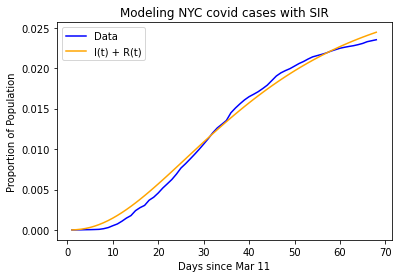

In [150]:
prob4()

# Problem 5

In this problem we will solve the BVP in the lab pdf modeling measles cases.

Let the periodic function for our measles case be $\beta(t) = \beta_0(1 + \beta_1 \cos{2\pi t})$.
Use parameters $\beta_1 = 1,$ $\beta_0 = 1575,$ $\eta = 0.01,$ $\lambda = 0.0279,$ and $\mu = 0.02.$
With these parameter values, time is measured in years, so run the solution over the interval $[0, 1]$ to show a one-year cycle.
The boundary conditions  are just saying that the year will begin and end in the same state.

Create functions for the ODE and for the boundary conditions.
Solve the BVP with the given parameters over a period of one year, and plot the values of $S$, $E$, and $I$.
Compare your results with the figure in the lab pdf.

Hint: Use the initial conditions from the figure as your initial guess. 
Remember that the initial infected proportion is small, not 0.

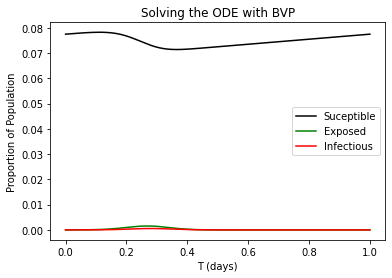

In [15]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value problem.
    '''
    # Initial parameters
    beta_0 = 1575
    beta_1 = 1
    mu = 0.01
    lamb = 0.0279
    def beta(t):
        return beta_0*(1 + beta_1*np.cos(2*np.pi*t))
    t0 = 0
    tf = 1
    ts = np.linspace(t0, tf, 300)
    y0 = np.array([0.075, .001, .001])  # Initial is not 0!
    
    # Define the ode
    def ode(t, y):
        S, E, I = y
        dS_dt = mu - beta(t)*S*I
        dE_dt = beta(t)*S*I - E/lamb
        dI_dt = E/lamb - I/mu
        return np.array([dS_dt, dE_dt, dI_dt])
    # Boundary conditions
    def bcs(ya, yb):
        return np.array([ya[0]-yb[0], ya[1]-yb[1], ya[2]-yb[2]])
    y_guess = y0.reshape((-1, 1))*np.ones((3, len(ts)))  # Shape must be (n,m)
    solution = solve_bvp(ode, bcs, ts, y_guess)
    
    # Plot it
    plt.plot(ts, solution.sol(ts)[0], c="black", label="Suceptible")
    plt.plot(ts, solution.sol(ts)[1], c="green", label="Exposed")
    plt.plot(ts, solution.sol(ts)[2], c="red", label="Infectious")
    plt.title("Solving the ODE with BVP")
    plt.xlabel('T (days)')
    plt.ylabel('Proportion of Population')
    plt.legend(loc="center right")
    plt.show()
    
prob5()